## 1.Business problem

In [77]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [78]:
df= pd.read_csv("NB_Car_Ad.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [79]:
#Selects 5 rows from the DataFrame
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [80]:
#Now will check shape of the data
df.shape

(400, 5)

In [81]:
#Check the null values
df.isna().sum() 
#from ouput we can see that there are zero null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [82]:
#Will get the summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [83]:
df.duplicated().sum()

0

In [84]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [85]:
df=df.drop(columns=['User ID'])

In [86]:
df.sample(3)

,Gender,Age,EstimatedSalary,Purchased
55,Female,24,55000,0
342,Female,38,65000,0
89,Male,35,50000,0


<Axes: xlabel='EstimatedSalary', ylabel='Age'>

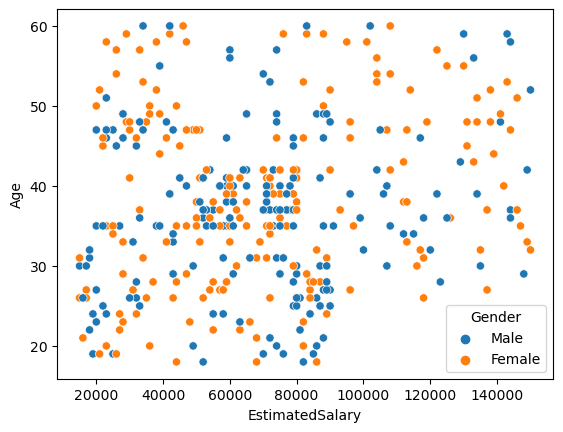

In [87]:
sns.scatterplot(df,x='EstimatedSalary',y='Age',hue='Gender')

<Axes: xlabel='EstimatedSalary', ylabel='Age'>

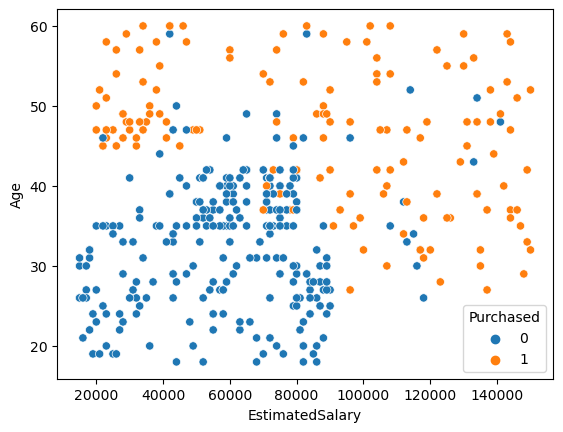

In [88]:
sns.scatterplot(df,x='EstimatedSalary',y='Age',hue='Purchased')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [90]:
# outlier diection in given system and working 

<Axes: >

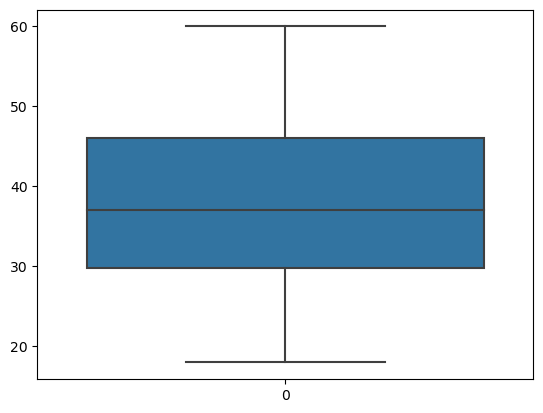

In [91]:
sns.boxplot(df['Age'])

<Axes: >

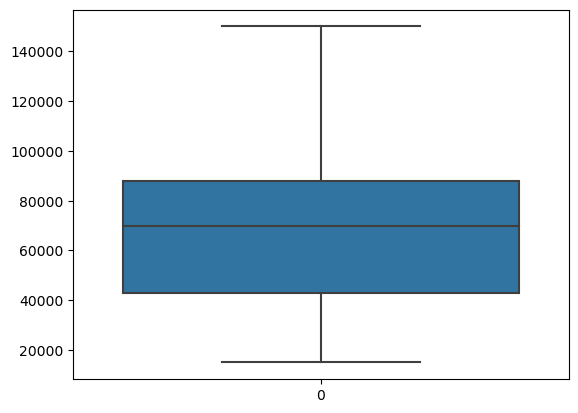

In [92]:
sns.boxplot(df['EstimatedSalary'])

<Axes: >

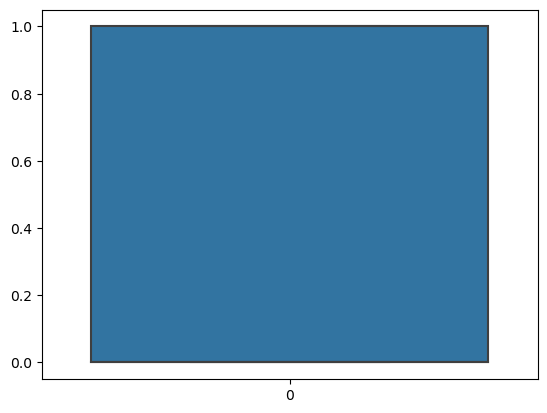

In [93]:
sns.boxplot(df['Purchased'])

In [94]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<Axes: >

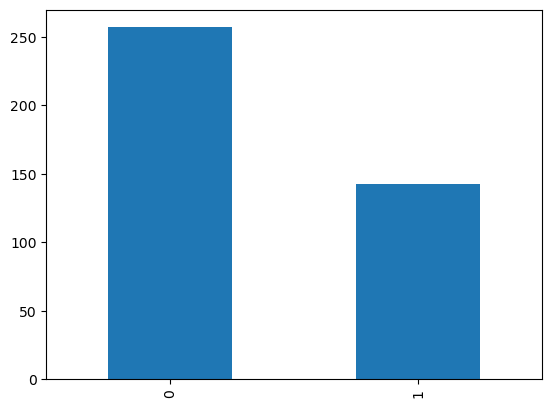

In [95]:
df['Purchased'].value_counts().plot(kind="bar")

## Data PreProcessing

In [96]:
#ordinal encoder 
from sklearn.preprocessing import LabelEncoder 

In [97]:
ord=LabelEncoder()
df['Gender']=ord.fit_transform(df['Gender'])

In [98]:
df.sample(3)

,Gender,Age,EstimatedSalary,Purchased
153,0,36,50000,0
95,0,35,44000,0
4,1,19,76000,0


## Model Spliting

In [99]:
X=df.iloc[:,:-1]
y=df['Purchased'].values

In [100]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42,test_size=0.2)

## After Splitng train the model

In [101]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import BernoulliNB

In [102]:
clf1 =MultinomialNB()
clf2=BernoulliNB()

In [103]:
clf1.fit(X_train,y_train)

MultinomialNB()

In [104]:
clf2.fit(X_train,y_train)

BernoulliNB()

In [105]:
y_pre1=clf1.predict(X_test)
y_pre2=clf2.predict(X_test)

## Check the Accuracy

In [106]:
from sklearn.metrics import accuracy_score,f1_score 
accuracy_score(y_test,y_pre1)

0.6

In [107]:
accuracy_score(y_test,y_pre2)

0.65

In [108]:
from sklearn.ensemble import RandomForestClassifier 
clf3=RandomForestClassifier()

In [109]:
clf3.fit(X_train,y_train)

RandomForestClassifier()

In [110]:
y_pre3=clf3.predict(X_test)
accuracy_score(y_test,y_pre3)

0.9125

In [111]:
from xgboost import XGBClassifier

In [112]:
clf4=XGBClassifier()

In [113]:
clf4.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [114]:
y_pre4=clf4.predict(X_test)
accuracy_score(y_test,y_pre4)

0.875

In [115]:
X_train=X_train.iloc[:,1:]

In [116]:
X_test=X_test.iloc[:,1:]

In [117]:
clf3.fit(X_train,y_train)

RandomForestClassifier()

In [118]:
y_pre3=clf3.predict(X_test)
accuracy_score(y_test,y_pre3)

0.9

In [119]:
clf4=XGBClassifier()
clf4.fit(X_train,y_train)
y_pre4=clf4.predict(X_test)
accuracy_score(y_test,y_pre4)

0.9